In [32]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
im = Image.open("cover_image.png")

# CMSE 401 Project Part 2 - NFL Game Simulation and Optimization With Numpy
### Authored by Annie Wilcox
Image from [League Simulator](https://www.leaguesimulator.eu/competition/fantasy/nfl_simulation)

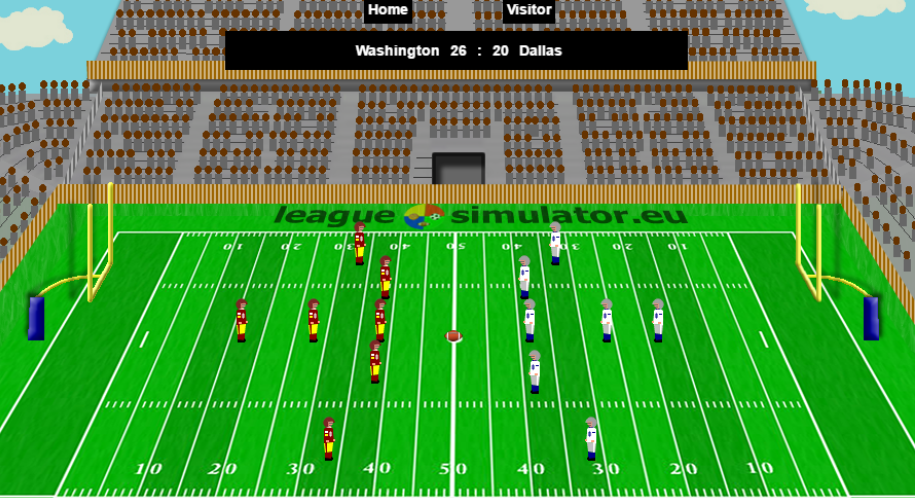

In [6]:
im

# Abstract
This project is an expansion on a previous project from CMSE 201. Originally the project was designed to use a binomial function in order to predict extra point/field goal kicks for NFL games. Building on the original I aimed to create a significantly more computationally expensive algorithm via NumPy arrays and matrices that uses real game, player, and play data from the 2024 season to simulate NFL games play-by-play. I chose to avoid visualizing the simulation in order to cater the optimization to Python Numba which is a just-in-time compiler (meaning that it compiles at run time rather than before) specially designed for use alongside NumPy operations. Numba is fantastic for cutting down on complex operations on its own but is even better utilized by its built in parallelization techniques which can break up computationally expensive algorithms on multiple threads.

# Methodology
## Serial Version:
The serial version of this simulation utilizes some of the [NFL Big Data Bowl 2025](https://www.kaggle.com/competitions/nfl-big-data-bowl-2025/data) datasets. The NFL Big Data Bowl is a competition that takes place every year calling data scientists to create an analysis/prediction tool based on a theme. I did not choose to compete, but the data provided is more than sufficiently comprehensive for the purposes of this project. The datasets include players, plays, and individual game data as well as tracking sheets for each week of the regular season. Utilizing the tracking sheets would've required a much heavier computational load than was necessary for the scope of this project, so I focused on the `games.csv` and `plays.csv` files. I created an `NFLSimulation` class which utilizes NumPy and Pandas to run the simulations. Each simulation uses the team abberviation to load in historical player and game data for both teams. The algorithm uses the `choose_play_type` function to choose each play based on current field position, down, time left, and score difference. The `get_play` function then chooses a historical play of the recorded type from the team in posession. These plays are used to update the game clock and field position of the ball. In order to create a realistic simulation, I chose to add the `np_intensive_computation` function which simulates the decision time it takes between play calls on the field. The serial code took about 30 minutes to simulate a game, which is similar to an average Madden game. The posession updates follow trends seen in realistic gameplay.
## Optimizations:
I created 2 optimizations for the simulation, both utilizing Python Numba - one using parallelization and one using simple Python Numba optimizations. Numba conveniently supports paralleization across for loops without the need to create a SLURM submisson script. This is a huge advantage of a JIT compiler, as no additional creation of files is necessary. All of your code, optimization included can be run within a Jupyter Notebook for simplicity. The optimized versions of the code both implement the `@njit` (Numba compiler flag) in the `np_intensive_computation` function in order to utilize Numba. The only difference between the optimization functions is the `parallel=True` flag, which enables parallelization within Numba. This is a great demonstration of how simple it is to utilize parallelization in Numba!
## Implementation:
In order to reproduce the code described above, simply navigate to the `NFL_Game_Predictions.ipynb` file and run each code cell. For each cell you should see a summary of the plays per calculated posession, as well as an end game summary. The code comments should give you an idea of what each function is doing so that you can implement or make changes to the simulation on your own. The serial code averaged about 30 minutes per game, while the optimized codes averaged 12 and 5 minutes respectivelty.

# Timing Results:

In [28]:
times = {
    "Optimized Parallel" : [285.0, 310.4, 297.5,322.5, 335.32 ],
    "Optimized Non-Parallel" : [735.35, 747.52, 741.25, 753.75,760.0 ]
}
times = pd.DataFrame(times)

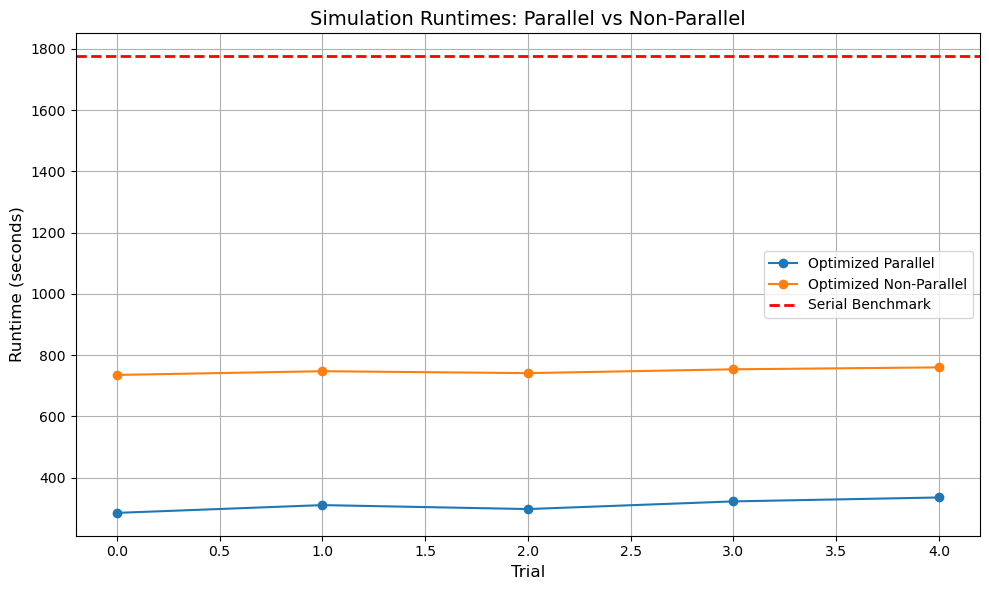

In [36]:
plt.figure(figsize=(10, 6))

for column in times.columns:
    plt.plot(times.index, times[column], marker='o', label=column)

plt.axhline(y=1776, color='red', linestyle='--', linewidth=2, label='Serial Benchmark')

# Labeling
plt.title("Simulation Runtimes: Parallel vs Non-Parallel", fontsize=14)
plt.xlabel("Trial", fontsize=12)
plt.ylabel("Runtime (seconds)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Overall, parallelization sped up the simulation by approximately 82.5% (5.7x) and even the non-parallel verison of Numba computations sped up the simulation by 57.9% (2.7x). It's important to note that the serial benchmark used was considered constant, based on an averaged time study of the runs. I chose to view the recorded runtimes this way because the range of values visible is already quite wide, I wanted to focus on the difference in optimization times rather than serial code runtimes. Similar to most compiler optimizations we have explored this semester, I noticed that parallel compilation optimization resulted in far less variability in runtime. Not only does Python Numba optimize NumPy operations, it also strengthens the runtime consistency of your project, resulting in less susceptibility to competiton with other job requests on the same network.

# Conclusions and Future Work
Python Numba is a fantastic tool for increasing efficiency in computationally heavy Python code, however it is limited to usage with NumPy arrays and matrices which limit its accessibility. The scope of this project seemed to fit perfectly into Numba's constraints, however I quickly realized that increasing the computational complexity via additional variables didn't add much to the runtime. This is where the `np_intensive_computation` comes in. Creating an animation would certainly add bulk to the runtime of the program, but wouldn't interact much at all with Numba. Instead, I opted for less realistic visualzations, and instead chose to incorporate an element of "humanity" to the problem, represented by a computation block that would add load times representative of real time decision making processes to the simulation. An 83% speed-up in efficiency with the use of Python Numba is meant to be represntative of its complex optimization capabilities. My code and datasets were ultimately too simple to demonstrate Numba's effective optimization strategies without a buffer, but the project itself is an illustration of not only how capable NumPy is with mathematical computations on its own - easily pulling large amounts of data from complex datasets and performing calculations on it - to how much better it can be when used with a sister program such as Numba.

Statistics that focus on human interaction, such as sports, are incredibly difficult to recreate, even with the machine learning capabilites we have now. This is due to the truest human trait: randomness. Some days are inexplicably good or bad, and this can be nearly impossible to recreate with a computer. A project like this is inheritantly ever-evolving and always vulnerable to improvement. I could add stadium, trade portal, or even current event data to this simulation and it could continue to evolve and get more accurate. It might even grow past the capabilities of NumPy/Numba and evolve into a machine learning predictive algorithm. At the end of the day, this is a topic that infatuates millions of people, and will always have research being put into its analysis.